In [43]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [35]:
import numpy as np
# Code to inject a kilonova for the Kepler filter at different redshifts
def K2Kilonova(model,D):
    path = '/Users/ryanr/Documents/PhD/coding/Kasen models/OrderedBNS/'
    files=['t000A3.npy',
       't030A3p15.npy',
       't100A3p15.npy',
       't300A3p15.npy',
       'tinfA3p15.npy',
       't100A3p15_SD1e-2.npy',
       't100A3p15_SD1e-3.npy',
       't100A3p15_SD1e-4.npy',
       't100A3p15_SD1e-5.npy',
       'a80_leak_HR.npy']
    data = np.load(path+files[model]).item()
    time = data['time']
    # Make a 30 min interpolated model to fit more closely with Kepler frames.
    keptime = np.arange(time[0],time[-1],30*60)
    Ikep = np.interp(data['wavelength'], Kepfilt[:,0], Kepfilt[:,1])
    lum = data['luminosity']*Ikep
    Lum = np.zeros((lum.shape[0],lum.shape[1],1))
    Mag = np.zeros((lum.shape[0],lum.shape[1],1))
    Kc = np.zeros((lum.shape[0],lum.shape[1],1))
    Kepcounts = np.zeros((lum.shape[0],keptime.shape[0]))
    
    d = D*3.1e18# distance in pc to cm
    for i in range(lum.shape[0]):
        for j in range(lum.shape[1]):
            Lum[i,j] = np.nansum(lum[i,j,:])*(5781.3**2/(3*10**18))/(4*np.pi*d**2)
            Mag[i,j] = -5/2*np.log10(Lum[i,j]) - 48.6
            Kc[i,j] = 10**(-2/5*(Mag[i,j]-25.47))
        Kepcounts[i,:] = np.interp(keptime,time,Kc[i,:,0])
    return Kepcounts, keptime 

In [36]:
test1, test2 = K2Kilonova(1,10)

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in log10


<IPython.core.display.Javascript object>


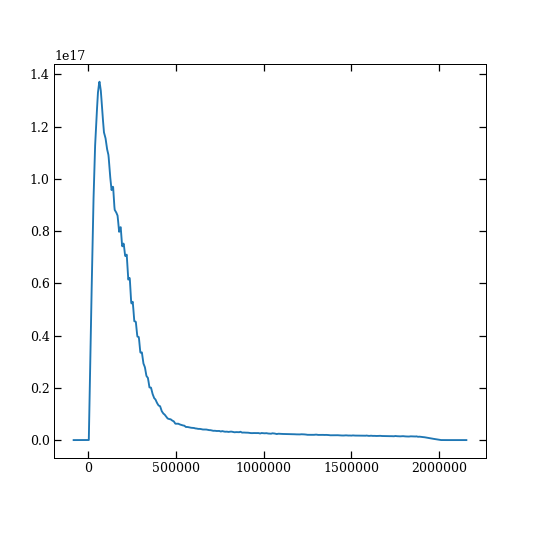

In [37]:

plt.figure()

plt.plot(test2,test1[0,:]);

<IPython.core.display.Javascript object>


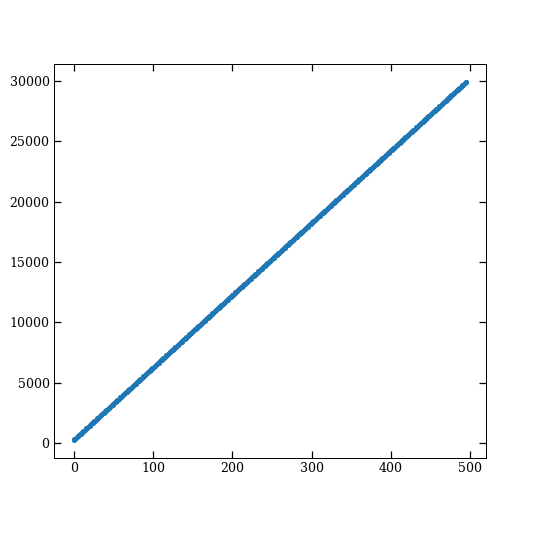

In [49]:
plt.figure()
plt.plot(data['wavelength'],'.')

In [50]:
data['wavelength']

array([   230.,    290.,    350.,    410.,    470.,    530.,    590.,
          650.,    710.,    770.,    830.,    890.,    950.,   1010.,
         1070.,   1130.,   1190.,   1250.,   1310.,   1370.,   1430.,
         1490.,   1550.,   1610.,   1670.,   1730.,   1790.,   1850.,
         1910.,   1970.,   2030.,   2090.,   2150.,   2210.,   2270.,
         2330.,   2390.,   2450.,   2510.,   2570.,   2630.,   2690.,
         2750.,   2810.,   2870.,   2930.,   2990.,   3050.,   3110.,
         3170.,   3230.,   3290.,   3350.,   3410.,   3470.,   3530.,
         3590.,   3650.,   3710.,   3770.,   3830.,   3890.,   3950.,
         4010.,   4070.,   4130.,   4190.,   4250.,   4310.,   4370.,
         4430.,   4490.,   4550.,   4610.,   4670.,   4730.,   4790.,
         4850.,   4910.,   4970.,   5030.,   5090.,   5150.,   5210.,
         5270.,   5330.,   5390.,   5450.,   5510.,   5570.,   5630.,
         5690.,   5750.,   5810.,   5870.,   5930.,   5990.,   6050.,
         6110.,   61

In [44]:
data = np.load(path+files[0]).item()
Ikep = np.interp(data['wavelength'], Kepfilt[:,0], Kepfilt[:,1])
lum = data['luminosity']*Ikep
Lum = np.zeros((lum.shape[0],lum.shape[1],1))
Mag = np.zeros((lum.shape[0],lum.shape[1],1))
Kc = np.zeros((lum.shape[0],lum.shape[1],1))
D = 1
d = D*3.1e18# distance in pc to cm
for i in range(lum.shape[0]):
    for j in range(lum.shape[1]):
        Lum[i,j] = np.nansum(lum[i,j,:])*(5781.3**2/(3*10**18))/(4*np.pi*d**2)
        Mag[i,j] = -5/2*np.log10(Lum[i,j]) - 48.6
        Mag[i,j] = Mag[i,j]+48.6 - 25.47
        Kc[i,j] = 10**(-2/5*(Mag[i,j]-25.47))
        

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


In [38]:
test = np.loadtxt('/Users/ryanr/Documents/PhD/coding/Filters/Kepler/Kepler.dat')

In [40]:
test.shape

(623, 2)

<IPython.core.display.Javascript object>


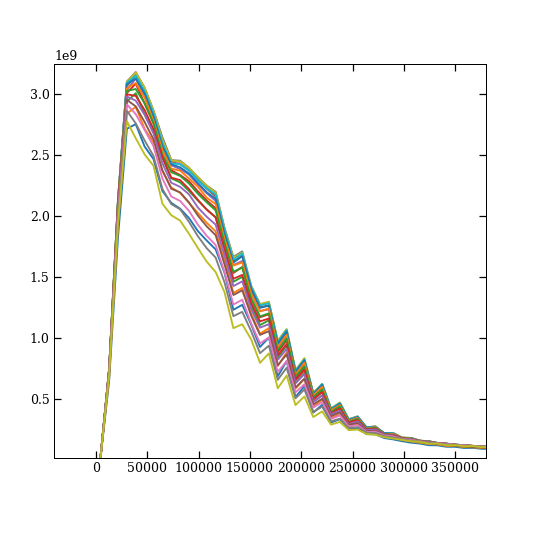

In [6]:
plt.figure()
for i in range(Lum.shape[0]):
    plt.plot(data['time'],Kc[i]);

In [ ]:
np.log(10)

In [ ]:
test = np.load('/Users/ryanr/Documents/PhD/coding/Kasen models/OrderedBNS/'+files[k].split('.')[0]+'.npy')
test

In [ ]:
data['angle']

In [ ]:
Data = {}
Data['luminosity'] = lum
Data['time'] = np.array(time)
Data['wavelength'] = Wavelength
np.save('/Users/ryanr/Documents/PhD/coding/Kasen models/OrderedBNS/')

In [ ]:
Data['wavelength'].shape

In [ ]:
import matplotlib.animation as animation
fig, ax = plt.subplots()
line, = ax.plot(Wavelength, lum[0,0,:])
#ax.set_ylim(35000,60000)
ax.set_ylim(1e28,1e40)
ax.set_yscale('log')
ax.set_ylabel('Counts/s')
ax.set_xlabel('Wavelength (A)')
plt.minorticks_on()
ax.minorticks_on()

def animate(i):
    line.set_ydata(lum[0,i,:])  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(Wavelength, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, init_func=init, blit=True)

In [ ]:
gap=0
while kepang[0][0][gap,0]==kepang[0][0][0,0]:
    gap = gap+1